In [1]:
!pip uninstall keras -y
!pip install keras==2.15.0  # Specify the exact version

Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.4 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install unidecode

In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import SGD,Adam
from keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
# Import for KerasClassifier (assuming Keras 2.15.0)
from scikeras.wrappers import KerasClassifier
from keras.callbacks import EarlyStopping

In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text





def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct








def joining(text):
    out=' '.join(text)
    return out


import random  # Import the random module

def preprocessing(text, synonyms):
  # Existing preprocessing steps
  out = remove_punctuations(replace_strings(text))

  # Apply data augmentation
  out = data_augmentation(out, synonyms)
  return out

def data_augmentation(sentence, synonyms):
  # Apply synonym replacement
  new_sentence = sentence  # Create a copy to avoid modifying original sentence

  for word in new_sentence.split():
    if word in synonyms:
      synonym = random.choice(synonyms[word])  # Choose a random synonym using 'random'
      new_sentence = new_sentence.replace(word, synonym)

  return new_sentence  # Return the augmented sentence

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/hatespeechbanglatrain.csv')
display(df)

,sentence,target,type,hate speech
0,.... ঐ ইন্দুর তোই মরছ নাই?,ind,callToViolence,1
1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,ind,callToViolence,1
2,✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,ind,callToViolence,1
3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাব...,female,callToViolence,1
4,২য় মীর জাফরের মুখে মুতে দে...,male,callToViolence,1
...,...,...,...,...
40219,��� গানটা চালু করে ওয়াস রুমে গিয়েছিলাম! এসে দে...,NaN,NaN,0
40220,���� হালকার উপজেলা ঝাপসা,NaN,NaN,0
40221,���� ��,NaN,NaN,0
40222,���� ��পুরাই আগুনের গুলা� () ��,NaN,NaN,0


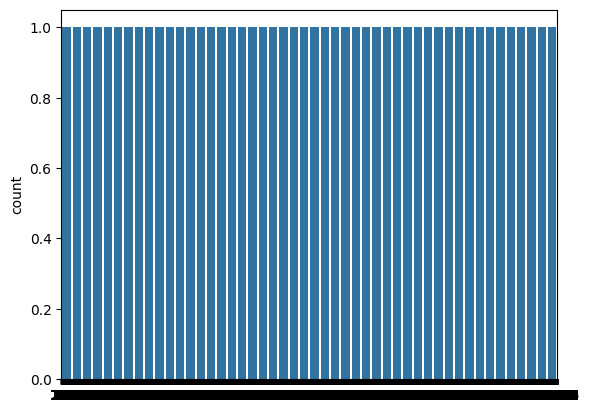

In [ ]:
sns.countplot(df['hate speech']);

In [ ]:
# Define synonyms dictionary with proper string literals for Bengali words
synonyms = {
  "খারাপ": ["মন্দ", "দুষ্ট", "নষ্ট", "অসন্তুষ্ট"],  # Encoded Bengali words (use string literals)
  "ঘৃণা": ["বিদ্বেষ", "অশ্রদ্ধা", "অতিশয় বিতৃষ্ণা", "নোংরামির জন্য বিরাগ"]  # Encoded Bengali words (use string literals)
}
df['sentence'] = df.sentence.apply(lambda x: preprocessing(str(x), synonyms))

In [ ]:
display(df)

,sentence,target,type,hate speech
0,ঐ ইন্দুর তোই মরছ নাই,ind,callToViolence,1
1,গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আমি...,ind,callToViolence,1
2,মুরগি চোরের পাছায় ডুকবি আর মারবি,ind,callToViolence,1
3,কোটির চোদা খাওয়া শেষে এখন কোটির চোদা খাবে মিথিলা,female,callToViolence,1
4,য় মীর জাফরের মুখে মুতে দে,male,callToViolence,1
...,...,...,...,...
40219,গানটা চালু করে ওয়াস রুমে গিয়েছিলাম এসে দেখি আ...,NaN,NaN,0
40220,হালকার উপজেলা ঝাপসা,NaN,NaN,0
40221,,NaN,NaN,0
40222,পুরাই আগুনের গুলা,NaN,NaN,0


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
train1, test1 = train_test_split(df,random_state=69, test_size=0.2)
training_sentences = []
testing_sentences = []



train_sentences=train1['sentence'].values
train_labels=train1['hate speech'].values
for i in range(train_sentences.shape[0]):
    #print(train_sentences[i])
    x=str(train_sentences[i])
    training_sentences.append(x)

training_sentences=np.array(training_sentences)





test_sentences=test1['sentence'].values
test_labels=test1['hate speech'].values

for i in range(test_sentences.shape[0]):
    x=str(test_sentences[i])
    testing_sentences.append(x)

testing_sentences=np.array(testing_sentences)


train_labels=keras.utils.to_categorical(train_labels)


test_labels=keras.utils.to_categorical(test_labels)
print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))

Training Set Length: 32179
Testing Set Length: 8045
training_sentences shape: (32179,)
testing_sentences shape: (8045,)
train_labels shape: (32179, 2)
test_labels shape: (8045, 2)


In [ ]:
!pip install bnlp_toolkit

In [ ]:
from bnlp import BengaliWord2Vec

In [ ]:
from gensim.models import Word2Vec

Embedding_dimensions = 300

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(),training_sentences ))

In [ ]:
bwv = BengaliWord2Vec()

In [ ]:
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=2)

In [ ]:

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 17589


In [ ]:
print(training_sentences[1])
print(train_labels[0])

আমরা মুসলমান তাই মুসলমান দের পক্ষে ই কথা বলবো
[0. 1.]


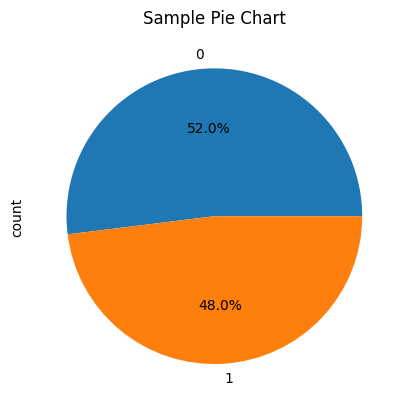

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
value_counts = df['hate speech'].value_counts()

# Plot a pie chart
value_counts.plot.pie(autopct='%.1f%%')

# Add a title
plt.title("Sample Pie Chart")

# Show the plot
plt.savefig("Imbalanced Dataset.jpeg", dpi = 250)
plt.show()

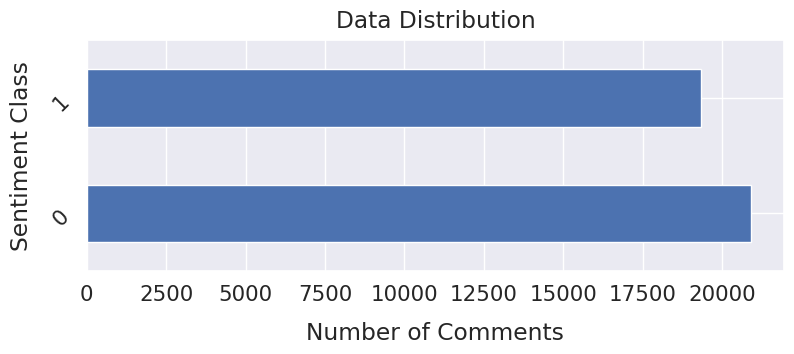

In [ ]:
sns.set(font_scale=1.4)
df['hate speech'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Data Distribution", y=1.02);

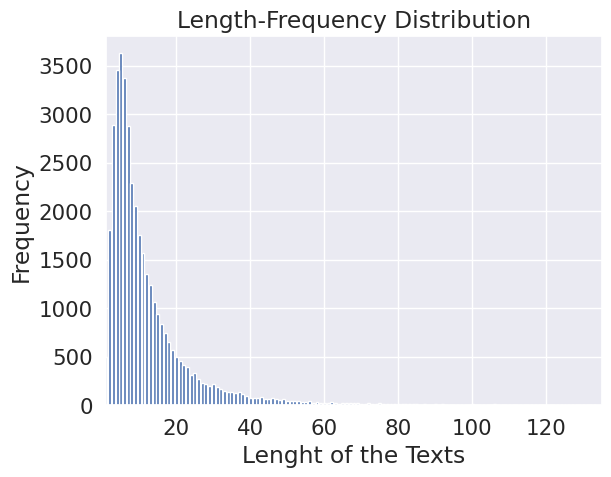

Maximum Length of a review: 552
Minimum Length of a review: 0
Average Length of a reviews: 13.0


In [ ]:
# Calculate the Review of each of the Review
df['ReviewLength'] = df.sentence.apply(lambda x:len(x.split()))
frequency = dict()
for i in df.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(df.ReviewLength)}")
print(f"Minimum Length of a review: {min(df.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(df.ReviewLength),0)}")

In [ ]:
df.shape

(40224, 5)

In [ ]:
df.head()

,sentence,target,type,hate speech,ReviewLength
0,ঐ ইন্দুর তোই মরছ নাই,ind,callToViolence,1,5
1,গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আমি...,ind,callToViolence,1,30
2,মুরগি চোরের পাছায় ডুকবি আর মারবি,ind,callToViolence,1,6
3,কোটির চোদা খাওয়া শেষে এখন কোটির চোদা খাবে মিথিলা,female,callToViolence,1,9
4,য় মীর জাফরের মুখে মুতে দে,male,callToViolence,1,6


In [ ]:
# count the number of samples in each class
class_counts = df['hate speech'].value_counts()
print(class_counts)

hate speech
0    20900
1    19324
Name: count, dtype: int64


In [ ]:
print(training_sentences.shape)
print(train_labels.shape)

(32179,)
(32179, 2)


In [ ]:
vocab_size = 25000
embedding_dim = 300
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

48122
Word index length:48122


In [ ]:
print("Sentence :--> \n")
print(training_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

এই চামচা গুলা দেখি করে পেলছে লোকটারে হয়রানী করতেছে বেশি

Sentence Tokenized and Converted into Sequence :--> 

[3, 1280, 307, 333, 4, 7729, 6633, 17601, 576, 157]

After Padding the Sequence with padding length 100 :--> 

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     3  1280   307   333     4  7729
  6633 17601   576   157]


In [ ]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (32179, 100)
Padded shape(testing): (8045, 100)


In [ ]:
# Assuming you have already defined vocab_length and Embedding_dimensions

embedding_matrix = np.zeros((vocab_size + 1, Embedding_dimensions))  # Increase the size of vocab_length by 1

for word, token in tokenizer.word_index.items():
    if token <= vocab_size:  # Ensure the token is within the bounds of the embedding matrix
        if word in word2vec_model.wv:
            embedding_matrix[token] = word2vec_model.wv[word]

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (25001, 300)


In [ ]:
from keras.optimizers import SGD,Adam,RMSprop

In [ ]:
def create_model(learning_rate, lstm_units, filters):
    with tf.device('/gpu:0'):
        model = Sequential()
        model.add(Embedding(vocab_size, embedding_dim, input_length=max_length,input_shape=(max_length,)))
        model.add(Conv1D(filters, kernel_size=3, activation="relu"))  # Use filters from hyperparameter
        model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))  # Use lstm_units from hyperparameter
        model.add(Dropout(0.5))
        model.add(Bidirectional(LSTM(lstm_units)))  # Use lstm_units from hyperparameter
        model.add(Dense(50, activation='relu'))
        model.add(Dense(50, activation='relu'))

        model.add(Flatten())
        # l2 regularizer (can be adjusted based on experiments)
        model.add(Dense(100, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
        model.add(Dense(2, activation='softmax'))
        adam = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
        model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
        return model
## i have place filters, learning_rate,lstm_units to KerasClassifier as it is needed for the new version
# set values for the parameters  like filters, learning_rate, lstm_units
model = KerasClassifier(build_fn=create_model,filters=850,learning_rate=.001,lstm_units=400)  # No need for 'filters' here
## param_grid
param_grid={'learning_rate': [0.0001, 0.0005],
            'filters': [128, 850],
            'lstm_units': [32, 400]}
grid = GridSearchCV(estimator=model,param_grid=param_grid, cv=2)
grid.fit(padded, train_labels)
best_model = grid.best_estimator_

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.5591 - loss: 1.2081
503/503 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.5609 - loss: 1.2101
503/503 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step - accuracy: 0.5891 - loss: 1.2033
503/503 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/step - accuracy: 0.5707 - loss: 1.2143
503/503 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.6799 - loss: 0.8914
503/503 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.6555 - loss: 0.9146
503/503 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 36s 62ms/step - accuracy: 0.6883 - loss: 0.9035
503/503 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/step - accuracy: 0.6628 - loss: 0.9290
503/503 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.6132 - loss: 1.2152
503/503 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5754 - loss: 1.2137
503/503 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 45s 80ms/step - accuracy: 0.6027 - loss: 1.1874
503/503 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 47s 81ms/step - accuracy: 0.5765 - loss: 1.2194
503/503 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.6998 - loss: 0.8824
503/503 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.7005 - loss: 0.8811
503/503 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 45s 80ms/step - accuracy: 0.6787 - loss: 0.9283
503/503 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 45s 82ms/step - accuracy: 0.6870 - loss: 0.9099
503/503 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1006/1006 ━━━━━━━━━━━━━━━━━━━━ 32s 27ms/step - accuracy: 0.7469 - loss: 0.7107


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history=best_model.fit(padded,train_labels,epochs=10,batch_size=256,validation_data=(testing_padded,test_labels),callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.5967 - loss: 1.1773 - val_accuracy: 0.8646 - val_loss: 0.6045
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9034 - loss: 0.4760 - val_accuracy: 0.8763 - val_loss: 0.4209
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9459 - loss: 0.2535 - val_accuracy: 0.8650 - val_loss: 0.3921
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9611 - loss: 0.1584 - val_accuracy: 0.8710 - val_loss: 0.4066
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9756 - loss: 0.1026 - val_accuracy: 0.8574 - val_loss: 0.4708
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9818 - loss: 0.0743 - val_accuracy: 0.8543 - val_loss: 0.5527
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9868 - loss: 0.0506 - val_accuracy: 0.8563 - val_loss: 0.5591
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9904 - loss: 0.0388 - val_ac

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


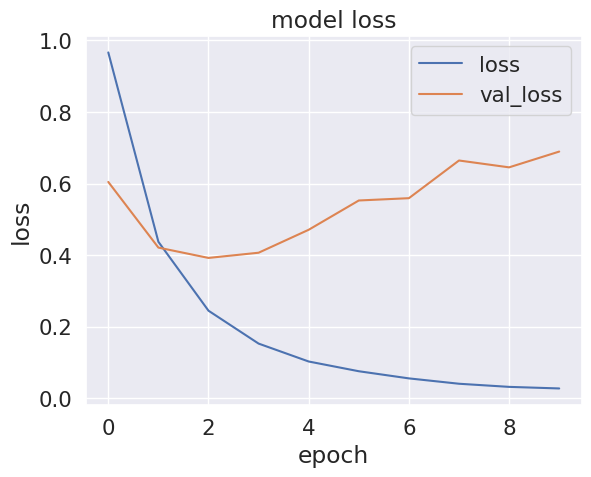

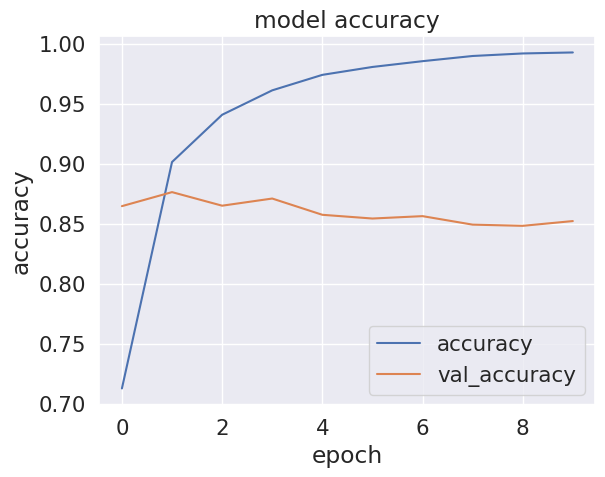

In [ ]:
print(history.history_.keys())
loss = history.history_['loss']
val_loss = history.history_['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history_['accuracy']
val_accuracy= history.history_['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Get predictions for the test set
predictions = best_model.predict(testing_padded)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Test Accuracy: 85.22%


In [ ]:
# Get predictions for the test set
predictions = best_model.predict(padded)

# Calculate accuracy
accuracy = accuracy_score(train_labels, predictions)
print("Train Accuracy: {:.2f}%".format(accuracy * 100))

1006/1006 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step
Train Accuracy: 99.59%


In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation
scores = cross_val_score(best_model, padded, train_labels, cv=5, scoring='accuracy')

# Print the mean and standard deviation of the scores
print("Mean Accuracy: {:.2f}%".format(scores.mean() * 100))
print("Standard Deviation: {:.2f}".format(scores.std()))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


805/805 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.7043 - loss: 0.7833
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


805/805 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.7006 - loss: 0.7751
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


805/805 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.7287 - loss: 0.7601
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


805/805 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.7020 - loss: 0.7857
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


805/805 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.7347 - loss: 0.7598
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Mean Accuracy: 88.08%
Standard Deviation: 0.00
